In [1]:
### IMPORTS AND READ CSV
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Initialise dataframe with headers
col_names = ["elevation", "aspect", "slope", "horizontaltohydro", "verticaltohydro", "horizontaltoroadway", "hillshade9am", "hillshadenoon", "hillshade3pm", "horizontaltofirepoints", "wildernessareaRawah", "wildernessareaNeota", "wildernessareaComanche", "wildernessareaCache", "soil1", "soi2", "soil3", "soil4", "soil5", "soil6", "soil7", "soil8", "soil9", "soil10", "soil11", "soil12", "soil13", "soil14", "soil15", "soil16", "soil17", "soil18", "soil19", "soil20", "soil21", "soil22", "soil23", "soil24", "soil25", "soil26", "soil27", "soil28", "soil29", "soil30", "soil31", "soil32", "soil33", "soil34", "soil35", "soil36", "soil37", "soil38", "soil39", "soil40", "target"]
cover_data = pd.read_csv('covtype.data', sep=',', names=col_names)
# Output dataframe contains 8124 entries

In [2]:
### DATA CLEANING
# Remove rows with ANY null values
X1 = cover_data.dropna()
# Output dataframe contains 581012 entries
X1

,elevation,aspect,slope,horizontaltohydro,verticaltohydro,horizontaltoroadway,hillshade9am,hillshadenoon,hillshade3pm,horizontaltofirepoints,...,soil32,soil33,soil34,soil35,soil36,soil37,soil38,soil39,soil40,target
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [3]:
### Cleaned training and target data, ready to encode, split, and train

# Training data without the target column
X = X1.drop(columns=["target"])

# Initialise target column  in new dataframe
Y = X1["target"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
# split data for no cross validation training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [9]:
%%time
# SGD Linear Support Vector Classifier - No Cross Validation -  max_iter = 1000
clfSGD = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge'))

clfSGD.fit(X_train, Y_train)

predict = clfSGD.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
svc_NoCV_1k = accuracy
svc_NoCV_1k

CPU times: total: 11 s
Wall time: 11 s


0.7135788232661807

In [10]:
%%time
# SGD Logistic Regression Classifier - No Cross Validation - max_iter = 1000
clfSGDLR = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss'))
clfSGDLR.fit(X_train, Y_train)

predict = clfSGDLR.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
lr_NoCV_1k = accuracy
lr_NoCV_1k

CPU times: total: 11 s
Wall time: 11 s


0.7100160925277317

In [11]:
%%time
### 10-fold Cross-validation loss hinge (linear SVC) - max_iter = 1000
accuracy_array_10 = []
k = 10
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGD.fit(X_train, Y_train)
    predict = clfSGD.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_10.append(accuracy)

average_accuracy_10 = sum(accuracy_array_10)/k
svc_10fold_1k = average_accuracy_10
print("avg:" + str(svc_10fold_1k))


0.6717496815944374
0.8384392964097621
0.7299530128569216
0.6926386809177123
0.6148603294263438
0.630574344675651
0.6806595411438702
0.7129653534362576
0.5826405741725615
0.5907471472091702
avg:0.6745227961842689
CPU times: total: 2min 7s
Wall time: 1min 55s


In [14]:
%%time
### 5-fold Cross-validation loss hinge (linear SVC) - max iter = 1000
accuracy_array_5 = []
k = 5
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGD.fit(X_train, Y_train)
    predict = clfSGD.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_5.append(accuracy)

average_accuracy_5 = sum(accuracy_array_5)/k
svc_5fold_1k = average_accuracy_5
print("avg:" + str(svc_5fold_1k))

0.7488963279777631
0.7047322358286792
0.5891034577718112
0.7054009397428616
0.5887850467289719
avg:0.6673836016100174
CPU times: total: 1min
Wall time: 54.5 s


In [15]:
%%time
### 10-fold Cross-validation logistic regression - max iter = 1000
accuracy_array_10 = []
k = 10
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGDLR.fit(X_train, Y_train)
    predict = clfSGDLR.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_10.append(accuracy)

average_accuracy_10 = sum(accuracy_array_10)/k
lr_10fold_1k = average_accuracy_10
print("avg:" + str(lr_10fold_1k))

0.7143299714295549
0.8212626071391691
0.7244625737939107
0.7082322163129723
0.5611263145212647
0.6420715650333041
0.6900569697595567
0.7323798213455879
0.5814013528166468
0.6184058794168775
avg:0.6793729271568844
CPU times: total: 2min 11s
Wall time: 1min 58s


In [16]:
%%time
### 5-fold Cross-validation logistic regression - max iter = 1000
accuracy_array_5 = []
k = 5
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGDLR.fit(X_train, Y_train)
    predict = clfSGDLR.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_5.append(accuracy)

average_accuracy_5 = sum(accuracy_array_5)/k
lr_5fold_1k = average_accuracy_5
print("avg:" + str(lr_5fold_1k))

0.7482250888531277
0.7083638116055524
0.5933374640711864
0.7058742534551901
0.599103285657734
avg:0.6709807807285582
CPU times: total: 1min 1s
Wall time: 55.3 s


In [18]:
# split data again for no cro
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
%%time
# SGD Linear Support Vector Classifier - No Cross Validation - max_iter = 500
clfSGD500 = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge',max_iter=500))

clfSGD500.fit(X_train, Y_train)

predict = clfSGD500.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
svc_NoCV_500 = accuracy
svc_NoCV_500

CPU times: total: 10.4 s
Wall time: 10.3 s


0.7134153162999234

In [20]:
%%time
# SGD Logistic Regression Classifier - No Cross Validation - max_iter = 500
clfSGDLR500 = make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss',max_iter=500))

clfSGDLR500.fit(X_train, Y_train)

predict = clfSGDLR500.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
lr_NoCV_500 = accuracy
lr_NoCV_500

CPU times: total: 12 s
Wall time: 10.7 s


0.7166596387356609

In [21]:
%%time
### 10-fold Cross-validation loss hinge (linear SVC) - max_iter = 500
accuracy_array_10 = []
k = 10
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGD500.fit(X_train, Y_train)
    predict = clfSGD500.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_10.append(accuracy)

average_accuracy_10 = sum(accuracy_array_10)/k
svc_10fold_500 = average_accuracy_10
print("avg:" + str(svc_10fold_500))

0.6706825926818354
0.8284740628549792
0.7256157381112202
0.7043940723911809
0.608027400561092
0.6431903065351715
0.6973029724101134
0.742982048501747
0.5679936662019587
0.5964785459802757
avg:0.6785141406229573
CPU times: total: 2min 2s
Wall time: 1min 49s


In [22]:
%%time
### 5-fold Cross-validation loss hinge (linear SVC)- max_iter = 500
accuracy_array_5 = []
k = 5
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGD500.fit(X_train, Y_train)
    predict = clfSGD500.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_5.append(accuracy)

average_accuracy_5 = sum(accuracy_array_5)/k
svc_5fold_500 = average_accuracy_5
print("avg:" + str(svc_5fold_500))

0.7486897928624906
0.7081056427114618
0.5452918194179102
0.7160375897144627
0.5872790485533812
avg:0.6610807786519413
CPU times: total: 57.3 s
Wall time: 50.4 s


In [23]:
%%time
### 10-fold Cross-validation logistic regression - max_iter = 500
accuracy_array_10 = []
k = 10
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGDLR500.fit(X_train, Y_train)
    predict = clfSGDLR500.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_10.append(accuracy)

average_accuracy_10 = sum(accuracy_array_10)/k
lr_10fold_500 = average_accuracy_10
print("avg:" + str(lr_10fold_500))

0.6832122818491618
0.8227943960620977
0.7171649369201907
0.7059086762706321
0.5610574688903806
0.6372351594636926
0.6931894459647855
0.7323109757147037
0.581005490439063
0.6176830002925939
avg:0.6751561831867302
CPU times: total: 2min 10s
Wall time: 1min 58s


In [24]:
%%time
### 5-fold Cross-validation logistic regression - max_iter = 500
accuracy_array_5 = []
k = 5
kf = KFold(n_splits=k, random_state=None)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    clfSGDLR500.fit(X_train, Y_train)
    predict = clfSGDLR500.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predict)
    print(accuracy)
    accuracy_array_5.append(accuracy)

average_accuracy_5 = sum(accuracy_array_5)/k
lr_5fold_500 = average_accuracy_5
print("avg:" + str(lr_5fold_500))

0.7611335335576535
0.7115651058922747
0.5885612984285985
0.6914683051926818
0.5997917419665755
avg:0.6705039970075568
CPU times: total: 59.9 s
Wall time: 53.2 s


In [25]:
print("LR No CV 1000: " + str(lr_NoCV_1k))
print("LR No CV 500: " + str(lr_NoCV_500))
print("LR 5Fold 1000: " + str(lr_5fold_1k))
print("LR 5Fold 500: " + str(lr_5fold_500))
print("LR 10fold 1000: " + str(lr_10fold_1k))
print("LR 10fold 500: " + str(lr_10fold_500))

print("SVC No CV 1000: " + str(svc_NoCV_1k))
print("SVC No CV 500: " + str(svc_NoCV_500))
print("SVC 5fold 1000: " + str(svc_5fold_1k))
print("SVC 5fold 500: " + str(svc_5fold_500))
print("SVC 10fold 1000: " + str(svc_10fold_1k))
print("SVC 10fold 500: " + str(svc_10fold_500))


LR No CV 1000: 0.7100160925277317
LR No CV 500: 0.7166596387356609
LR 5Fold 1000: 0.6709807807285582
LR 5Fold 500: 0.6705039970075568
LR 10fold 1000: 0.6793729271568844
LR 10fold 500: 0.6751561831867302
SVC No CV 1000: 0.7135788232661807
SVC No CV 500: 0.7134153162999234
SVC 5fold 1000: 0.6673836016100174
SVC 5fold 500: 0.6610807786519413
SVC 10fold 1000: 0.6745227961842689
SVC 10fold 500: 0.6785141406229573


In [ ]:
### GridSearchCV Hyperparameter Search

In [26]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=999)

In [28]:
### 
clfNoParams = SGDClassifier(random_state = 999)

In [95]:
### Search Space
search_space = {
    "loss" : ["hinge", "log_loss"],
    "penalty" : ["l2", "l1", "elasticnet"],
}


In [96]:
from sklearn.model_selection import GridSearchCV

### Create a GridSearchCV with 10-fold cross-validation, score by accuracy
GS = GridSearchCV(estimator = clfNoParams,
                  param_grid = search_space,
                  scoring = ["accuracy"],
                  refit = "accuracy",
                  cv = 10,
                  verbose = 4
)

In [97]:
GS.fit(X_train,Y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END .loss=hinge, penalty=l2; accuracy: (test=0.710) total time=   9.7s
[CV 2/10] END .loss=hinge, penalty=l2; accuracy: (test=0.716) total time=   8.5s
[CV 3/10] END .loss=hinge, penalty=l2; accuracy: (test=0.712) total time=   8.0s
[CV 4/10] END .loss=hinge, penalty=l2; accuracy: (test=0.716) total time=   8.0s
[CV 5/10] END .loss=hinge, penalty=l2; accuracy: (test=0.708) total time=   8.2s
[CV 6/10] END .loss=hinge, penalty=l2; accuracy: (test=0.713) total time=   8.3s
[CV 7/10] END .loss=hinge, penalty=l2; accuracy: (test=0.715) total time=   8.1s
[CV 8/10] END .loss=hinge, penalty=l2; accuracy: (test=0.711) total time=   8.9s
[CV 9/10] END .loss=hinge, penalty=l2; accuracy: (test=0.709) total time=   8.2s
[CV 10/10] END loss=hinge, penalty=l2; accuracy: (test=0.708) total time=   8.4s
[CV 1/10] END .loss=hinge, penalty=l1; accuracy: (test=0.712) total time=  21.2s
[CV 2/10] END .loss=hinge, penalty=l1; accuracy:

GridSearchCV(cv=10, estimator=SGDClassifier(random_state=999),
             param_grid={'loss': ['hinge', 'log_loss'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             refit='accuracy', scoring=['accuracy'], verbose=4)

In [29]:
GS.best_params_

NameError: name 'GS' is not defined

In [99]:
GS.best_score_

0.7146569859518414

In [101]:
GS.cv_results_

{'mean_fit_time': array([ 8.51451635, 21.22952065, 12.23272917,  8.58736007, 22.50823865,
        11.36811037]),
 'std_fit_time': array([0.48773639, 2.09518468, 0.31744035, 0.28340502, 3.46417552,
        0.30816094]),
 'mean_score_time': array([0.00926414, 0.00909824, 0.00939925, 0.00939932, 0.00920906,
        0.00961716]),
 'std_score_time': array([0.00049167, 0.00053786, 0.00066527, 0.00048842, 0.00043757,
        0.00050641]),
 'param_loss': masked_array(data=['hinge', 'hinge', 'hinge', 'log_loss', 'log_loss',
                    'log_loss'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l1', 'elasticnet', 'l2', 'l1', 'elasticnet'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'loss': 'hinge', 'penalty': 'l2'},
  {'loss': 'hinge', 'penalty': 'l1'},
  {'loss': 'hinge', 'penalty': 'elasticn

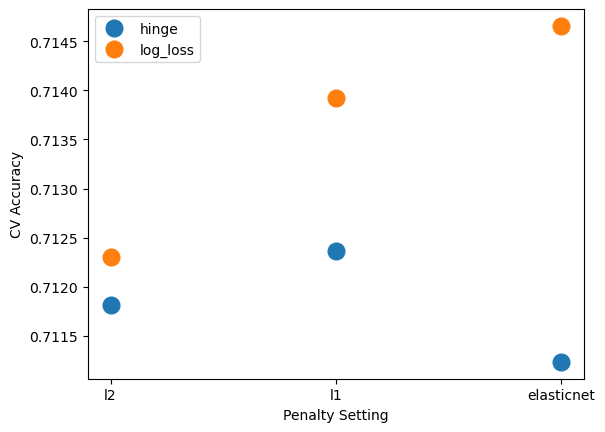

In [107]:
df = pd.DataFrame(GS.cv_results_)
groups = df.groupby("param_loss")

fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.param_penalty, group.mean_test_accuracy, marker='o', linestyle='', ms=12, label=name)
ax.legend()
ax.set(xlabel='Penalty Setting', ylabel='CV Accuracy')
plt.show()


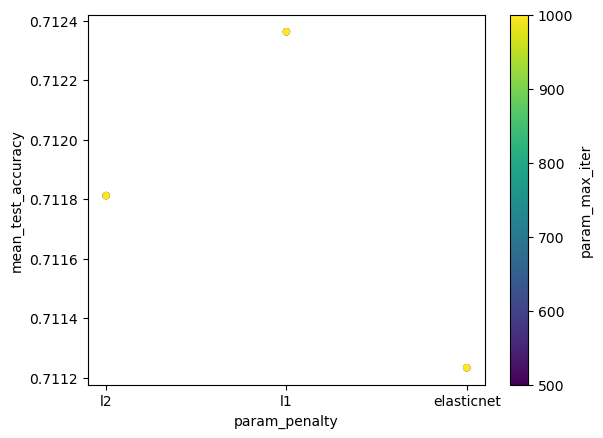

In [53]:
### Graph from original run of GridSearchCV with max_iter in search space
## data from old GridSearchCV has been overwritten, do NOT rerun this cell

ax2 = dfhinge.plot.scatter(x="param_penalty",y="mean_test_accuracy",c="param_max_iter",colormap='viridis')

In [34]:
clfBest = SGDClassifier(loss="log_loss",max_iter=1000,penalty="elasticnet")

In [35]:
%%time
clfBest.fit(X_train, Y_train)

predict = clfBest.predict(X_test)

accuracy = accuracy_score(Y_test, predict)
accuracy

CPU times: total: 13.7 s
Wall time: 13.7 s


0.7153257661161933

In [36]:
from sklearn.metrics import confusion_matrix

final_matrix = confusion_matrix(Y_test, predict)

[Text(0.5, 23.52222222222222, 'Predicted Values'),
 Text(50.722222222222214, 0.5, 'Actual Values')]

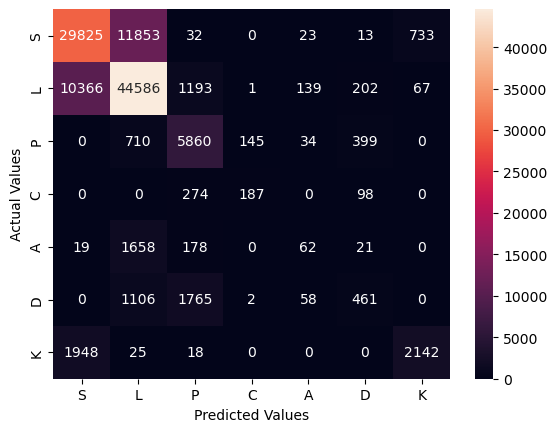

In [37]:
import seaborn as sn
labels = ["S","L","P","C","A","D","K"]
cf_matrix = sn.heatmap(final_matrix, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
cf_matrix.set(xlabel='Predicted Values', ylabel='Actual Values')

In [38]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predict, zero_division=1))

              precision    recall  f1-score   support

           1       0.71      0.70      0.70     42479
           2       0.74      0.79      0.77     56554
           3       0.63      0.82      0.71      7148
           4       0.56      0.33      0.42       559
           5       0.20      0.03      0.06      1938
           6       0.39      0.14      0.20      3392
           7       0.73      0.52      0.61      4133

    accuracy                           0.72    116203
   macro avg       0.56      0.48      0.49    116203
weighted avg       0.70      0.72      0.70    116203

